In [1]:
from scipy.fft import fft2, fftshift
from pathlib import Path
import numpy as np
import skimage
import matplotlib.pyplot as plt

In [2]:
ASSETS_FOLDER_PATH = "./assets"
OUTPUT_FOLDER_PATH = "."

In [3]:
Path(OUTPUT_FOLDER_PATH).mkdir(parents=True, exist_ok=True)

In [4]:
squares = skimage.io.imread(fname=f"{ASSETS_FOLDER_PATH}/Noisy_Squares.tif")

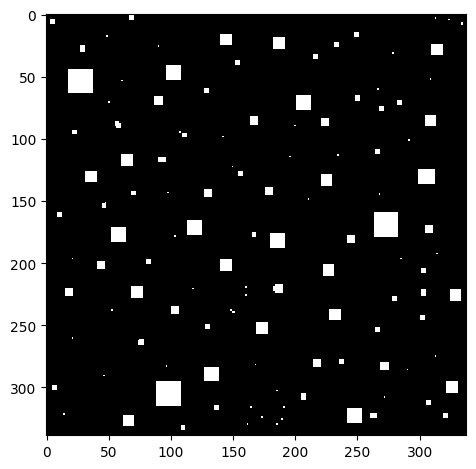

In [5]:
skimage.io.imshow(squares)

In [6]:
estructural_element = np.ones((13, 13), dtype=np.uint8)
estructural_element

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

In [7]:
image = squares

In [ ]:
row_size = (estructural_element.shape[0] // 2)
col_size = (estructural_element.shape[1] // 2)

In [9]:
new_image = image.copy()
n_rows = image.shape[0]
n_cols = image.shape[1]
for n_row in range(n_rows):
    for n_col in range(n_cols):
        if n_col+col_size > n_cols-1 or n_col-col_size < 0 or n_row+row_size > n_rows-1 or n_row-row_size < 0:
            new_image[n_row, n_col] = 0
        else:
            if image[n_row, n_col] == 255:
                first_row = n_row-row_size
                last_row = n_row+row_size+1

                first_col = n_col-col_size
                last_col = n_col+col_size+1

                should_delete = np.any((estructural_element == 1) & (image[first_row:last_row, first_col:last_col] == 0))
                if should_delete:
                    new_image[n_row, n_col] = 0

/home/pauli/.cache/pypoetry/virtualenvs/image-processing-7fMnORJO-py3.10/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


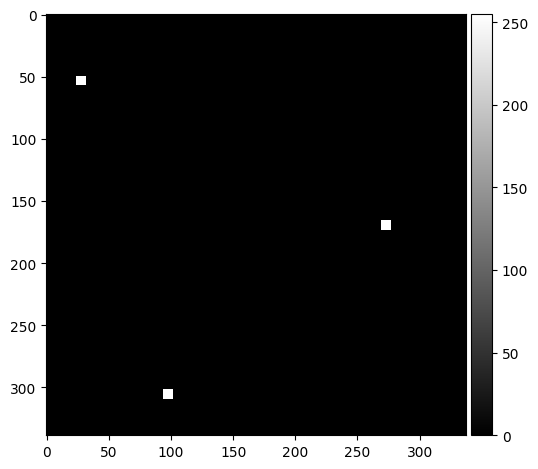

In [10]:
skimage.io.imshow(new_image, cmap="gray", vmin=0, vmax=255)